<h2 style = 'color: orange'> EDA - Ride-sharing company - Chicago, US. </h2>

The .csv files in this EDA were generated through SQL queries.

In [88]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

# Importando Libs de plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

<h3 style = 'color: orange'> Reading files:</h3>

In [89]:
# trips_amount: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

trips_amount = pd.read_csv('moved_project_sql_result_01.csv')
trips_amount

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [90]:
# número médio de viagens em novembro de 2017 para bairros de Chicago onde as corridas terminaram 

dropoff_and_avg = pd.read_csv('moved_project_sql_result_04.csv')
dropoff_and_avg

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [91]:
# Dados sobre viagens do Loop para o Aeroporto Internacional O'Hare

trips_loop_ohare = pd.read_csv('moved_project_sql_result_07.csv')
trips_loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


<h3 style = 'color: orange'> Data preprocessing:</h3>

Analyzing the DataFrame: trips_amount

In [92]:
trips_amount.head(3)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367


In [93]:
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [94]:
trips_amount.duplicated().sum()

0

In [95]:
# Verificando duplicados implícitos:

trips_amount['company_name'].str.lower().str.strip().duplicated().sum()

0

Analyzing the DataFrame: dropoff_and_avg

In [96]:
dropoff_and_avg.head(3)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667


In [97]:
dropoff_and_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [98]:
dropoff_and_avg.duplicated().sum()

0

In [99]:
# Verificando duplicados implícitos:

dropoff_and_avg['dropoff_location_name'].str.lower().str.strip().duplicated().sum()

0

In [100]:
# Passando os dados da coluna 'average_trips' para tipo INT, acredito que não faz sentido ter dados de corridas fracionadas.

dropoff_and_avg['average_trips'] =  dropoff_and_avg['average_trips'].astype(int)

In [101]:
dropoff_and_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


Analyzing the DataFrame: trips_loop_ohare

In [102]:
trips_loop_ohare.head(3)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0


In [103]:
trips_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [104]:
trips_loop_ohare.duplicated().sum()

197

In [105]:
trips_loop_ohare['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [106]:
# Descartando dados duplicados:

trips_loop_ohare.drop_duplicates(inplace=True)
trips_loop_ohare.duplicated().sum()

0

In [107]:
# Passando os dados da coluna 'start_ts' para datetime:

trips_loop_ohare['start_ts'] = pd.to_datetime(trips_loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [108]:
trips_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


In [116]:
#  Criando coluna com os dias da semana (0: segunda-feira, 6: domingo):

trips_loop_ohare['day_of_week'] = trips_loop_ohare['start_ts'].dt.day_of_week
trips_loop_ohare.head(3)

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5


<h3 style = 'color: orange'> Data analyses:</h3>

In [109]:
trips_amount.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


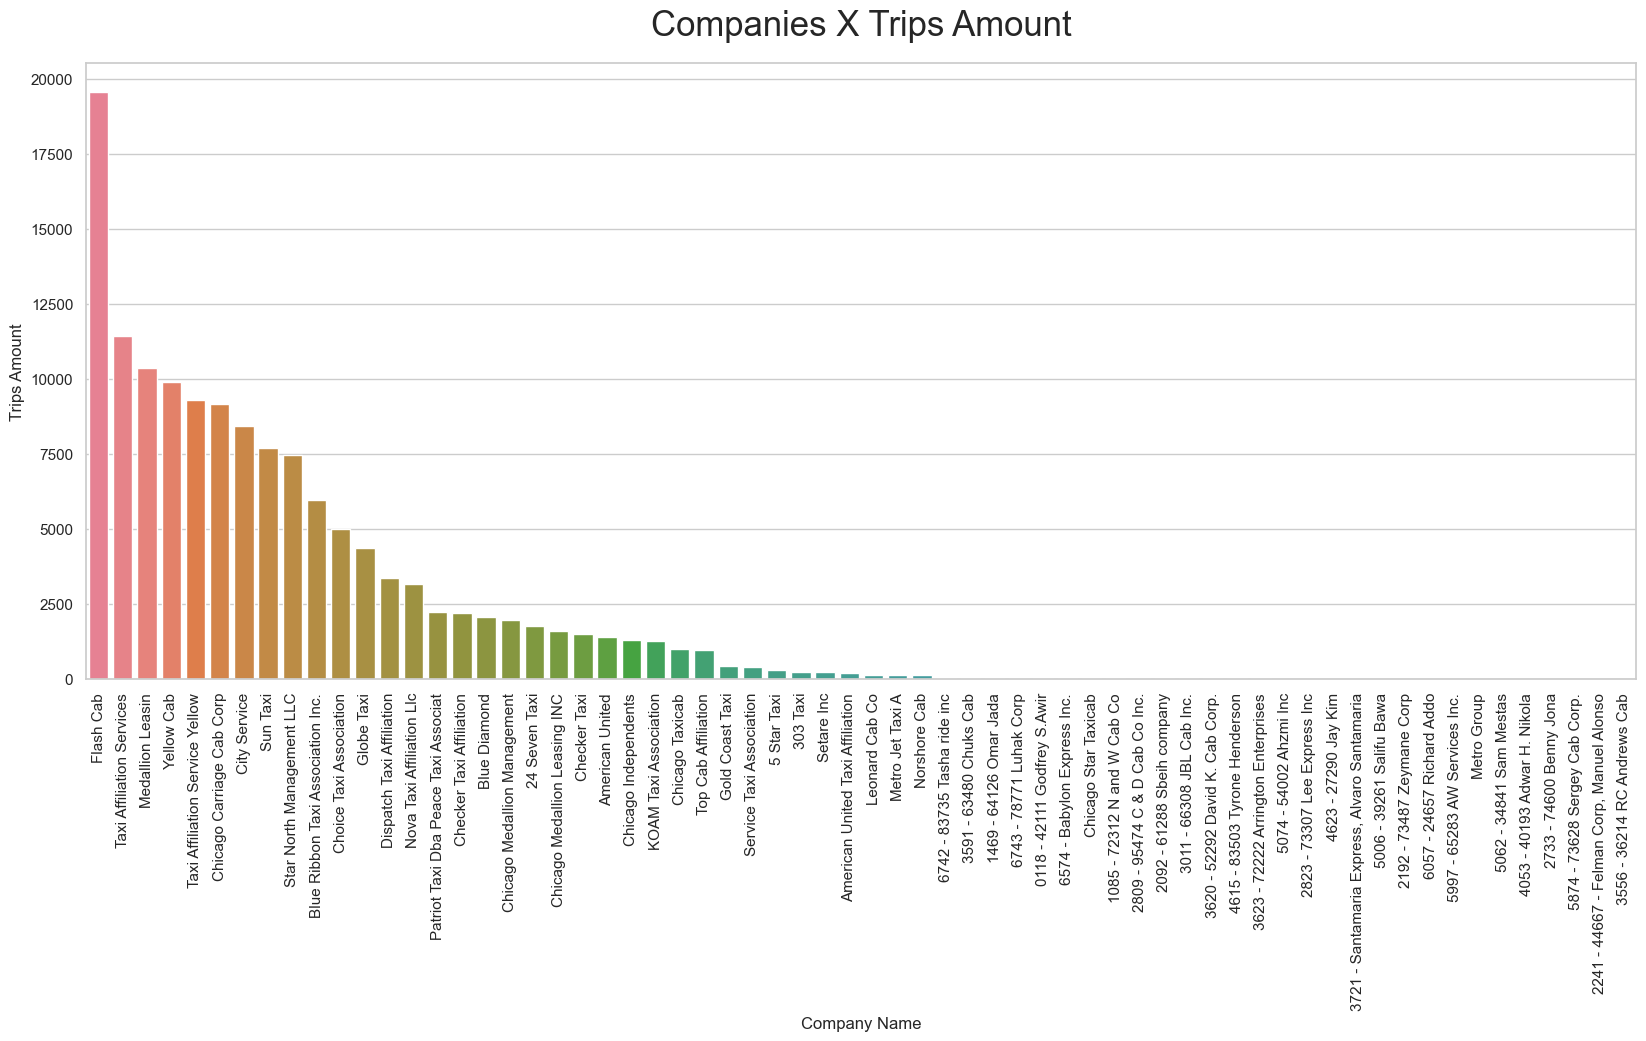

In [110]:
# Barplot da quantidade de viagens por empresas:

fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(hue = 'company_name',
            x = 'company_name',
            y= 'trips_amount',
            data = trips_amount, ax = ax1);

ax1.set_title("Companies X Trips Amount", fontsize=25, pad=20);
ax1.set_xlabel("Company Name");
ax1.set_ylabel("Trips Amount");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

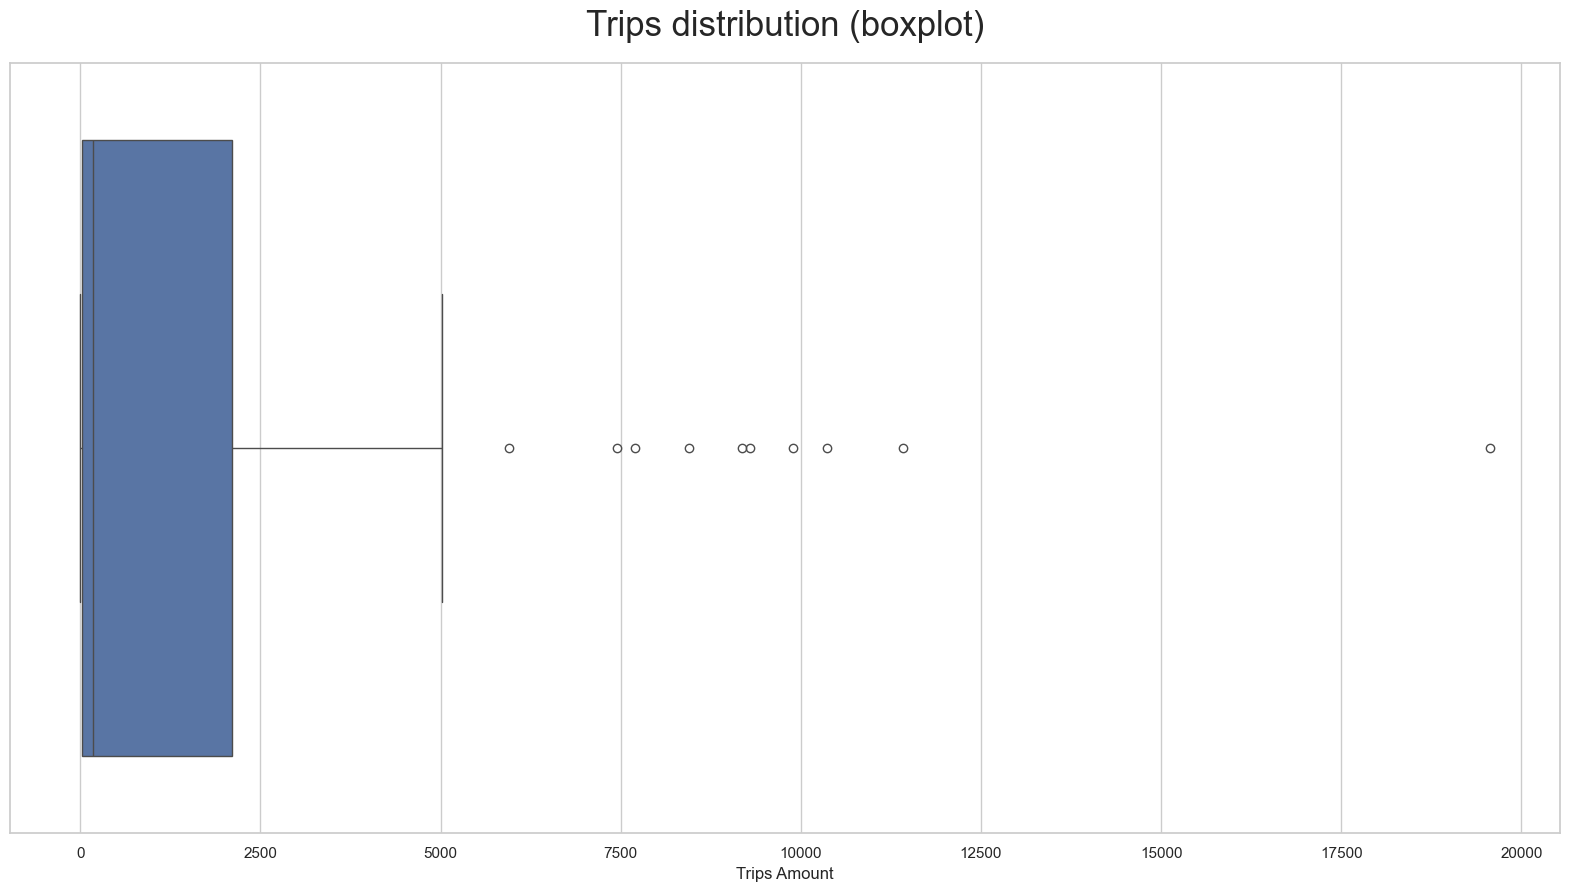

In [111]:
# Boxplot da destribuição de viagens:

fig, (ax1) = plt.subplots(1, figsize=(20, 10))

sns.boxplot(data = trips_amount['trips_amount'], orient='h', ax = ax1);

ax1.set_title("Trips distribution (boxplot)", fontsize=25, pad=20);
ax1.set_xlabel("Trips Amount");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=00);

In [112]:
trips_amount['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Ao analisar os graficos e os numeros de corridas por empresas, percebo que o numero de corridas varia muito. Essa variação deve ser devido ao diferente tamanho das empresas.

Durante o período analisado, a empresa que menos fez viagem fez apenas 2. A empresa que mais fez viagens fez 19.558 viagens.

Metade das empresas fez menos de 179 viagens.

Conforme a destribuição apresentada no 'Boxplot', todas as empresas que fizeram mais de 5.000 viagens já são consideradas outliers (estão fora do intervalo interquartil (IQR)).

In [113]:
# 10 principais bairros em termos de destinos:

top10_dropoff_location = dropoff_and_avg.sort_values(by='average_trips', ascending=False).head(10)
top10_dropoff_location

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


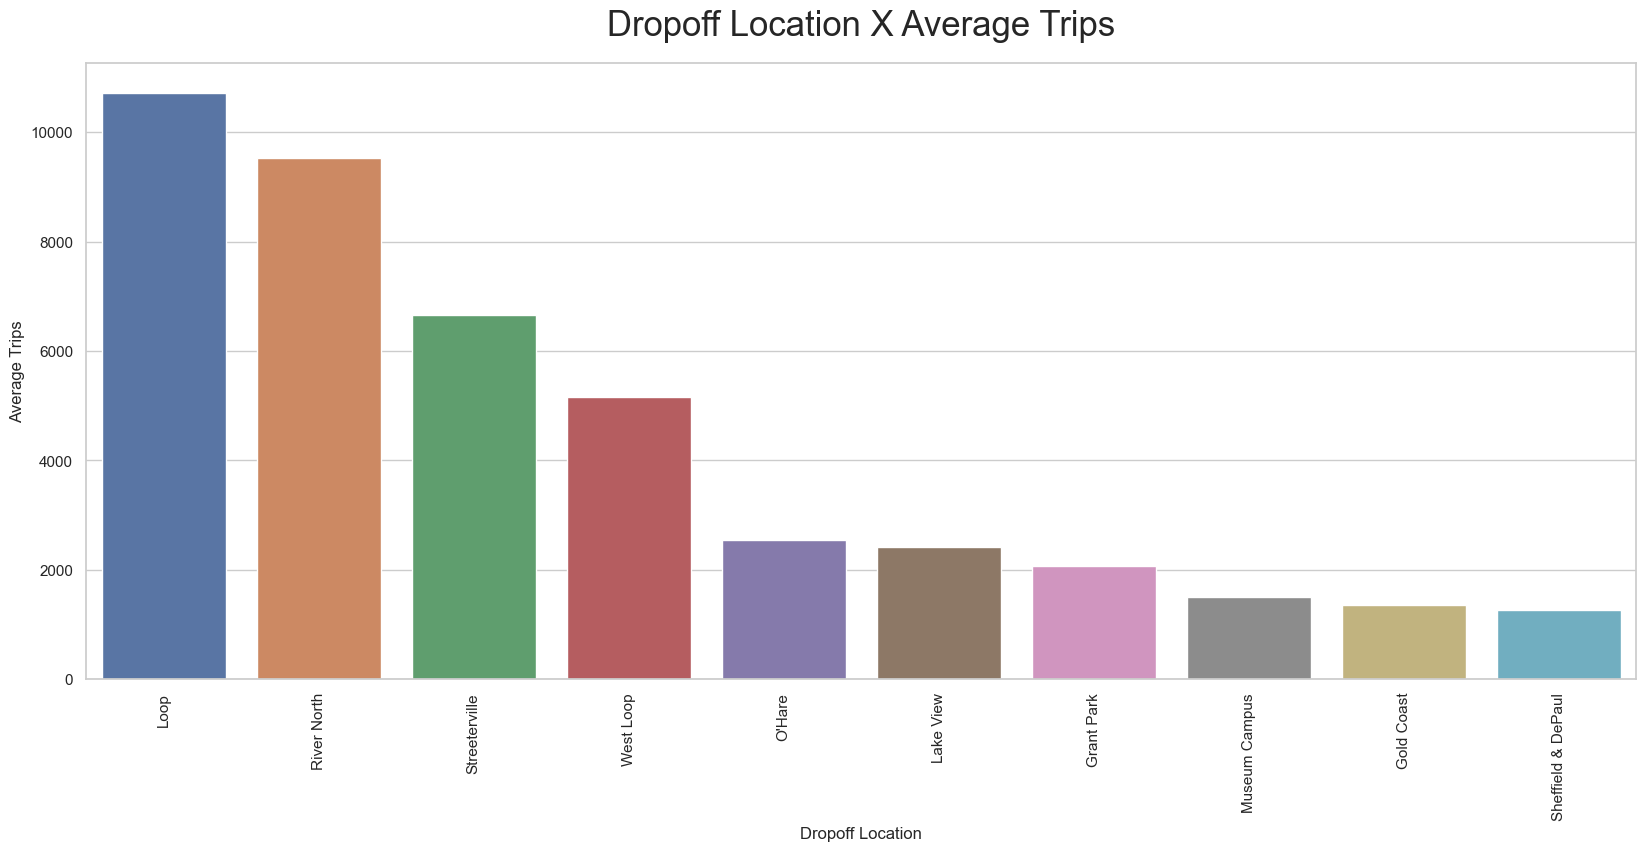

In [114]:
# Barplot do top 10 bairros por número de corridas em que esse bairro é destino:

fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(hue = 'dropoff_location_name',
            x = 'dropoff_location_name',
            y= 'average_trips',
            data = top10_dropoff_location, ax = ax1);

ax1.set_title("Dropoff Location X Average Trips", fontsize=25, pad=20);
ax1.set_xlabel("Dropoff Location");
ax1.set_ylabel("Average Trips");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

Os principais bairros que são destinos de corridas, dentro do TOP 10, são: Loop (10727), River North (9523), Streeterville (6664) e West Loop (5163). Esses bairros apresentam numeros consideravelmente maiores que os outros bairros que completam o TOP 10, que apresentam numeros médios entre 1259 e 2546.

<h3 style = 'color: orange'> Testing hypotheses:</h3>

Realizarei um teste de hipótese para saber se a duração média das viagens do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos..

Para isso usaremos os dados das colunas 'duration_seconds' que apresentam a duração das viagens em segundos e da coluna 'weather_conditions' que apresenda as condições do tempo.

Hipótese Nula = A duração média das viagens não muda nos sábados chuvosos. 

Hipótese Alternativa = A duração média das viagens não são as mesmas nos sábados chuvosos e nos sábados sem chuva.

Limiar de significância estatística que será adotado = 5%

O teste das seguintes hipóteses ajudara a perceber se as condições do tempo interferem na duração das viagens.

In [117]:
trips_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [122]:
trips_loop_ohare['day_of_week'].value_counts()

day_of_week
5    871
Name: count, dtype: int64

In [121]:
trips_loop_ohare['weather_conditions'].value_counts()

weather_conditions
Good    723
Bad     148
Name: count, dtype: int64

In [130]:
# Variancia e Média do tempo das viagens com tempo bom:

trips_loop_ohare_good = trips_loop_ohare.query('weather_conditions == "Good"')
trips_loop_ohare_good.head(3)

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5


In [126]:
time_trips_loop_ohare_good = trips_loop_ohare_good['duration_seconds']

In [127]:
np.var(time_trips_loop_ohare_good)

597389.5417434273

In [128]:
time_trips_loop_ohare_good.mean()

2032.253112033195

In [131]:
# Variancia e Média do tempo das viagens com mau tempo:

trips_loop_ohare_bad = trips_loop_ohare.query('weather_conditions == "Bad"')
trips_loop_ohare_bad.head(3)

,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5


In [132]:
time_trips_loop_ohare_bad = trips_loop_ohare_bad['duration_seconds']

In [133]:
np.var(time_trips_loop_ohare_bad)

561003.0958728999

In [134]:
time_trips_loop_ohare_bad.mean()

2409.2297297297296

In [135]:
# t test:

alpha = 0.05

results = st.ttest_ind(time_trips_loop_ohare_good, time_trips_loop_ohare_bad, equal_var=False)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 9.126383933880083e-08
Rejeitamos a hipótese nula


Há evidências estatísticas suficientes para sugerir que há uma diferença significativa entre as médias das duas amostras. 

Sendo assim podemos dizer que o tempo médio das viagens do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.